In [50]:
'''
author: Felix Hol
date: 2019 June 11
Align bodypart coordinates, translation to put a specific bodypart at origin, rotation along body axis
'''

# import deeplabcut
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import tables
import glob
from sklearn.decomposition import PCA

In [28]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.style.use('seaborn-dark-palette')

In [9]:
fileList = glob.glob('/Users/felix/moreTest01-felix-2019-05-07/analyzeVideos/*DeepCut_resnet50_moreTest01May6shuffle1_65700.h5')
alignTo = 'bottom'

dfRelRotAll = pd.DataFrame()

for i in fileList:
    dataFile = i
    df = pd.read_hdf(dataFile)
    df.columns = df.columns.droplevel()
    dfRel = df.copy()
    for i in dfRel.columns.levels[0]:
        dfRel[i, 'x'] = dfRel[i, 'x'] - df[alignTo, 'x']
        dfRel[i, 'y'] = dfRel[i, 'y'] - df[alignTo, 'y']
    dfRelRot = dfRel.copy()
    for index, row in dfRelRot.iterrows():
        bodyAngle = getBodyAngle(dfRel, index)
        for i in dfRelRot.columns.levels[0]:
            dfRelRot[i, 'x'][index] = (dfRel[i, 'x'][index] * math.cos(bodyAngle)) - (dfRel[i, 'y'][index] * math.sin(bodyAngle))
            dfRelRot[i, 'y'][index] = (dfRel[i, 'x'][index] * math.sin(bodyAngle)) + (dfRel[i, 'y'][index] * math.cos(bodyAngle))
    dfRelRotAll = dfRelRotAll.append(dfRelRot, ignore_index=False)


In [10]:
dfRelRot.head()

bodyparts rightForeleg                        rightMiddleLeg              \
coords               x           y likelihood              x           y   
0            -6.988738  105.430915   0.020641      -8.665508  104.384290   
1            -7.707302  114.766601   0.025260       3.924872 -150.831735   
2            -4.975201  117.154340   0.030424       4.123557 -149.382545   
3            -2.549701  118.160533   0.035140       6.749508 -147.777940   
4            -5.851712  119.628236   0.027370       1.796335 -146.946626   

bodyparts            rightHindLeg                        leftForeleg  ...  \
coords    likelihood            x           y likelihood           x  ...   
0           0.835898  -110.325129 -141.973475   0.997467  233.089605  ...   
1           0.997855     5.845941  -59.838000   0.874222  236.034416  ...   
2           0.999681  -150.192941  -40.828133   0.998469  238.434139  ...   
3           0.996592    15.119634 -187.955409   0.557981  240.372280  ...   
4           0.996702    37.800574 -160.420349   0.388279  236.741198  ...   

bodyparts  proboscis        head                             abdomen  \
coords    likelihood           x             y likelihood          x   
0           0.999290  179.520840  8.526513e-14   0.998678  76.248911   
1           0.999727  176.126423  7.105427e-14   0.999107  78.600294   
2           0.999772  180.420415  0.000000e+00   0.999657  77.016908   
3           0.999697  181.349145 -2.842171e-14   0.999450  80.885919   
4           0.999729  175.887816  9.947598e-14   0.999337  76.186235   

bodyparts                      bottom                  
coords            y likelihood      x    y likelihood  
0          2.691749   0.980392    0.0  0.0   0.999642  
1          0.409566   0.970371    0.0  0.0   0.999052  
2          0.666798   0.977138    0.0  0.0   0.999413  
3          1.372455   0.966900    0.0  0.0   0.999657  
4          0.617511   0.911746    0.0  0.0   0.999510  

[5 rows x 30 columns]

In [ ]:
len(dfRelRot)

In [11]:
dfRelRotAll.head()

bodyparts rightForeleg                        rightMiddleLeg              \
coords               x           y likelihood              x           y   
0           221.558460 -159.507302   0.988209     221.905308 -156.557595   
1           190.010451 -174.552922   0.970651     191.110382 -171.627545   
2           274.169254 -119.496243   0.723838     155.326859 -201.895798   
3           267.041293 -108.298791   0.993829     -60.614649 -206.687225   
4           245.482223 -191.808898   0.954341     192.017383 -155.815085   

bodyparts            rightHindLeg                        leftForeleg  ...  \
coords    likelihood            x           y likelihood           x  ...   
0           0.206540   -42.248821 -198.352736   0.993706  290.033346  ...   
1           0.639543   -79.096798 -183.441211   0.994350  291.331691  ...   
2           0.996700   -83.775302  165.446310   0.996498  278.989752  ...   
3           0.267086  -161.043256  117.274151   0.993543  251.891946  ...   
4           0.816661  -112.148839  170.400504   0.999629  247.737772  ...   

bodyparts  proboscis        head                             abdomen  \
coords    likelihood           x             y likelihood          x   
0           0.999934  161.775698  4.263256e-14   0.999942  62.512093   
1           0.998764  156.643011  1.421085e-14   0.999865  60.400893   
2           0.998733  161.926675  7.105427e-14   0.999663  61.932609   
3           0.999511  148.903077  2.842171e-14   0.999847  58.020099   
4           0.996570  143.417535  1.421085e-14   0.993934  61.547387   

bodyparts                      bottom                  
coords            y likelihood      x    y likelihood  
0         -2.154714   0.996929    0.0  0.0   0.999963  
1         -3.276551   0.998923    0.0  0.0   0.999417  
2         -1.526923   0.986203    0.0  0.0   0.999271  
3         -6.539814   0.998515    0.0  0.0   0.999046  
4         -5.413394   0.962453    0.0  0.0   0.998587  

[5 rows x 30 columns]

In [ ]:
len(dfRelRotAll)

In [31]:
dataFile = '/Users/felix/moreTest01-felix-2019-05-07/analyzeVideos/181211_01_02_2921-3231DeepCut_resnet50_moreTest01May6shuffle1_65700.h5'
df = pd.read_hdf(dataFile)

In [32]:
df.columns = df.columns.droplevel()
df.head()

bodyparts rightForeleg                        rightMiddleLeg              \
coords               x           y likelihood              x           y   
0           196.136823  125.524626   0.999916      95.664972  380.195952   
1           195.912319  127.586683   0.999870      95.864506  382.659848   
2           196.173554  125.848523   0.999926      95.609051  380.054466   
3           197.695430  132.324559   0.999904      97.097896  386.539079   
4           197.998936  125.650672   0.999894      97.522682  380.401600   

bodyparts            rightHindLeg                        leftForeleg  ...  \
coords    likelihood            x           y likelihood           x  ...   
0           0.999829   204.185091  503.034855   0.999482  399.131225  ...   
1           0.999721   187.106885  494.582257   0.999246  399.578364  ...   
2           0.999799   170.456050  514.684018   0.999795  400.258316  ...   
3           0.999948   129.911724  538.253559   0.998424  401.576894  ...   
4           0.999845   114.935863  548.948813   0.998360  401.441238  ...   

bodyparts  proboscis        head                            abdomen  \
coords    likelihood           x           y likelihood           x   
0           0.999596  272.935869  226.373902   0.999994  255.353933   
1           0.999816  273.539634  229.512886   0.999995  255.411693   
2           0.999707  273.462688  226.044123   0.999993  255.101778   
3           0.999454  274.074273  234.388609   0.999993  257.026724   
4           0.999923  274.894321  230.927141   0.999996  255.094982   

bodyparts                             bottom                         
coords              y likelihood           x           y likelihood  
0          336.579220   0.998719  242.606630  417.495111   0.999976  
1          339.353102   0.998787  242.199596  422.201215   0.999838  
2          335.894611   0.998251  242.452604  419.567601   0.999943  
3          341.274425   0.999013  242.858949  425.596530   0.999879  
4          339.982969   0.999027  242.019637  418.078655   0.999688  

[5 rows x 30 columns]

In [33]:
alignTo = 'bottom'
dfRel = df.copy()

for i in dfRel.columns.levels[0]:
    dfRel[i, 'x'] = dfRel[i, 'x'] - df[alignTo, 'x']
    dfRel[i, 'y'] = dfRel[i, 'y'] - df[alignTo, 'y']

In [34]:
dfRel.head()

bodyparts rightForeleg                        rightMiddleLeg             \
coords               x           y likelihood              x          y   
0           -46.469807 -291.970486   0.999916    -146.941659 -37.299160   
1           -46.287277 -294.614532   0.999870    -146.335090 -39.541367   
2           -46.279051 -293.719078   0.999926    -146.843554 -39.513135   
3           -45.163519 -293.271972   0.999904    -145.761053 -39.057451   
4           -44.020701 -292.427984   0.999894    -144.496955 -37.677055   

bodyparts            rightHindLeg                        leftForeleg  ...  \
coords    likelihood            x           y likelihood           x  ...   
0           0.999829   -38.421540   85.539744   0.999482  156.524595  ...   
1           0.999721   -55.092711   72.381042   0.999246  157.378768  ...   
2           0.999799   -71.996554   95.116417   0.999795  157.805712  ...   
3           0.999948  -112.947225  112.657029   0.998424  158.717945  ...   
4           0.999845  -127.083774  130.870158   0.998360  159.421601  ...   

bodyparts  proboscis       head                           abdomen             \
coords    likelihood          x           y likelihood          x          y   
0           0.999596  30.329239 -191.121209   0.999994  12.747302 -80.915891   
1           0.999816  31.340039 -192.688329   0.999995  13.212097 -82.848114   
2           0.999707  31.010084 -193.523478   0.999993  12.649173 -83.672990   
3           0.999454  31.215324 -191.207921   0.999993  14.167775 -84.322106   
4           0.999923  32.874684 -187.151514   0.999996  13.075345 -78.095686   

bodyparts            bottom                  
coords    likelihood      x    y likelihood  
0           0.998719    0.0  0.0   0.999976  
1           0.998787    0.0  0.0   0.999838  
2           0.998251    0.0  0.0   0.999943  
3           0.999013    0.0  0.0   0.999879  
4           0.999027    0.0  0.0   0.999688  

[5 rows x 30 columns]

In [35]:
def getBodyAngle(dfRel, i):
    if dfRel[[('head','x')]].loc[i].values > 0 and dfRel[[('head','y')]].loc[i].values > 0:
        bodyAngleRaw = math.atan(dfRel[[('head','y')]].loc[i].values / dfRel[[('head','x')]].loc[i].values)
        bodyAngle = -1 * bodyAngleRaw
    elif dfRel[[('head','x')]].loc[i].values < 0 and dfRel[[('head','y')]].loc[i].values > 0:
        bodyAngleRaw = math.atan(dfRel[[('head','y')]].loc[i].values / (-1 * dfRel[[('head','x')]].loc[i].values))   
        bodyAngle = -1 * (math.pi - bodyAngleRaw)
    elif dfRel[[('head','x')]].loc[i].values < 0 and dfRel[[('head','y')]].loc[i].values < 0:
        bodyAngleRaw = math.atan((-1 * dfRel[[('head','y')]].loc[i].values) / (-1 * dfRel[[('head','x')]].loc[i].values))   
        bodyAngle = -1 * (math.pi + bodyAngleRaw)
    elif dfRel[[('head','x')]].loc[i].values > 0 and dfRel[[('head','y')]].loc[i].values < 0:
        bodyAngleRaw = math.atan((-1 * dfRel[[('head','y')]].loc[i].values) / (dfRel[[('head','x')]].loc[i].values))   
        bodyAngle = -1* (2 * math.pi - bodyAngleRaw)
    return bodyAngle


In [36]:
dfRelRot = dfRel.copy()
for index, row in dfRelRot.iterrows():
#     print(index)
    bodyAngle = getBodyAngle(dfRel, index)
#     print(bodyAngle)
    for i in dfRelRot.columns.levels[0]:
#         print(i)
#         print(dfRel[i, 'x'][index])
        dfRelRot[i, 'x'][index] = (dfRel[i, 'x'][index] * math.cos(bodyAngle)) - (dfRel[i, 'y'][index] * math.sin(bodyAngle))
        dfRelRot[i, 'y'][index] = (dfRel[i, 'x'][index] * math.sin(bodyAngle)) + (dfRel[i, 'y'][index] * math.cos(bodyAngle))
#         print(bodyAngle)
#         print(dfRel[i, 'x'][index])

In [37]:
dfRelRot.head()

bodyparts rightForeleg                       rightMiddleLeg              \
coords               x          y likelihood              x           y   
0           281.078958 -91.656026   0.999916      13.808041 -150.971575   
1           283.362535 -92.983378   0.999870      15.536353 -150.784946   
2           282.696997 -92.168625   0.999926      15.781687 -151.245679   
3           282.163542 -91.825532   0.999904      15.062083 -150.149601   
4           280.402241 -93.949619   0.999894      12.109585 -148.836448   

bodyparts            rightHindLeg                        leftForeleg  ...  \
coords    likelihood            x           y likelihood           x  ...   
0           0.999829   -90.504406  -24.540069   0.999482  310.642354  ...   
1           0.999721   -80.286654  -42.758335   0.999246  313.803642  ...   
2           0.999799  -105.309670  -56.040254   0.999795  314.113086  ...   
3           0.999948  -129.383236  -93.320203   0.998424  313.883109  ...   
4           0.999845  -150.883329 -102.525630   0.998360  313.496567  ...   

bodyparts  proboscis        head                             abdomen  \
coords    likelihood           x             y likelihood          x   
0           0.999596  193.512737 -3.552714e-15   0.999994  81.913776   
1           0.999816  195.220364  1.421085e-14   0.999995  83.894589   
2           0.999707  195.992249 -2.486900e-14   0.999993  84.620387   
3           0.999454  193.739169  3.552714e-14   0.999993  85.503135   
4           0.999923  190.016931  1.065814e-13   0.999996  79.180174   

bodyparts                      bottom                  
coords            y likelihood      x    y likelihood  
0         -0.092178   0.998719    0.0  0.0   0.999976  
1         -0.259431   0.998787    0.0  0.0   0.999838  
2         -0.748981   0.998251    0.0  0.0   0.999943  
3          0.396662   0.999013    0.0  0.0   0.999879  
4         -0.633104   0.999027    0.0  0.0   0.999688  

[5 rows x 30 columns]

In [ ]:
dfRelRotAll.to_csv('DLC_test01.csv')

In [ ]:
plt.figure()
df.plot(legend=False)

In [ ]:
plt.figure()
dfRel.plot(legend=False)

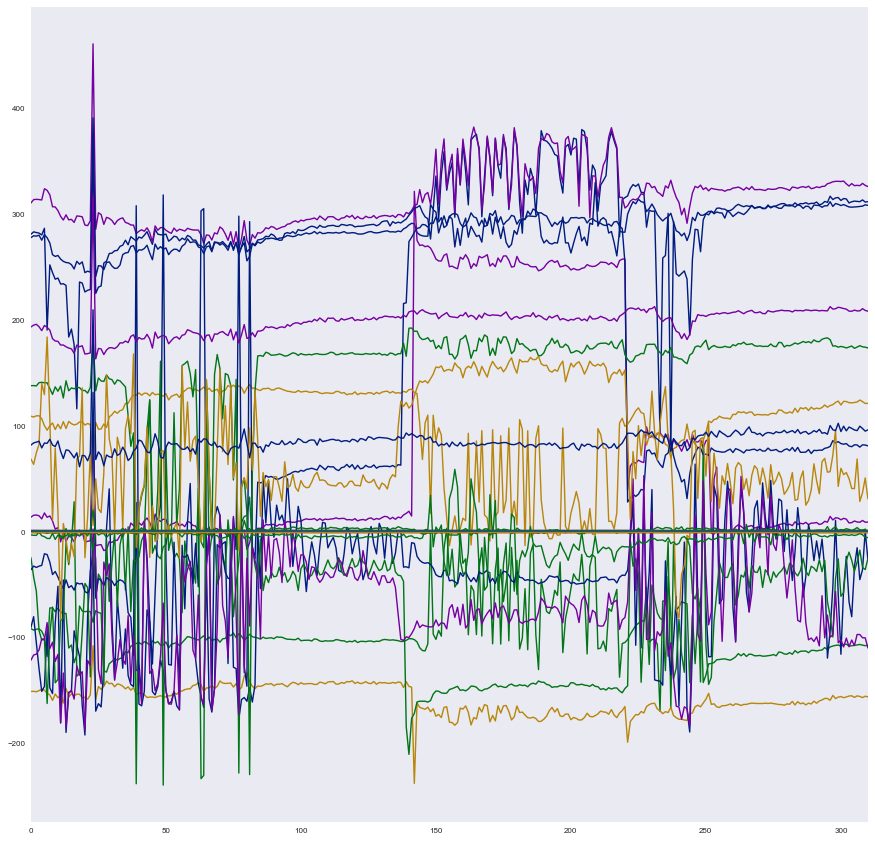

In [148]:
# ax = plt.figure()
ax = dfRelRot.plot(legend=False,figsize=(15,15))
ax.grid(False)
# plt.xlim([190, 380])

In [ ]:
plt.plot(df[[('head','x')]].loc[0], df[[('head','y')]].loc[0],'.r')
plt.plot(df[[('abdomen','x')]].loc[0], df[[('abdomen','y')]].loc[0],'.g')
plt.plot(df[[('bottom','x')]].loc[0], df[[('bottom','y')]].loc[0],'.k')
plt.plot(df[[('rightForeleg','x')]].loc[0], df[[('rightForeleg','y')]].loc[0],'.b')
plt.plot(df[[('leftForeleg','x')]].loc[0], df[[('leftForeleg','y')]].loc[0],'.m')

In [ ]:
plt.plot(dfRel[[('head','x')]].loc[0], dfRel[[('head','y')]].loc[0],'.r')
plt.plot(dfRel[[('abdomen','x')]].loc[0], dfRel[[('abdomen','y')]].loc[0],'.g')
plt.plot(dfRel[[('bottom','x')]].loc[0], dfRel[[('bottom','y')]].loc[0],'.k')
plt.plot(dfRel[[('rightForeleg','x')]].loc[0], dfRel[[('rightForeleg','y')]].loc[0],'.b')
plt.plot(dfRel[[('leftForeleg','x')]].loc[0], dfRel[[('leftForeleg','y')]].loc[0],'.m')

In [ ]:
plt.plot(dfRelRot[[('head','x')]].loc[0], dfRelRot[[('head','y')]].loc[0],'.r')
plt.plot(dfRelRot[[('abdomen','x')]].loc[0], dfRelRot[[('abdomen','y')]].loc[0],'.g')
plt.plot(dfRelRot[[('bottom','x')]].loc[0], dfRelRot[[('bottom','y')]].loc[0],'.k')
plt.plot(dfRelRot[[('rightForeleg','x')]].loc[0], dfRelRot[[('rightForeleg','y')]].loc[0],'.b')
plt.plot(dfRelRot[[('leftForeleg','x')]].loc[0], dfRelRot[[('leftForeleg','y')]].loc[0],'.m')

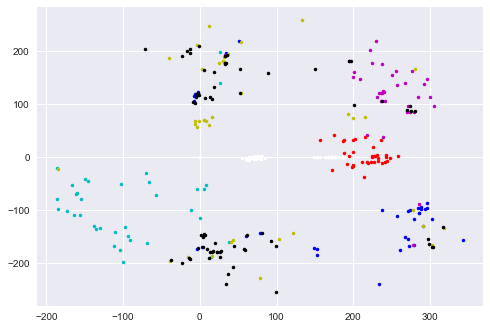

In [20]:
plt.plot(dfRelRot[[('head','x')]].loc[:], dfRelRot[[('head','y')]].loc[:],'.w')
plt.plot(dfRelRot[[('abdomen','x')]].loc[:], dfRelRot[[('abdomen','y')]].loc[:],'.w')
plt.plot(dfRelRot[[('bottom','x')]].loc[:], dfRelRot[[('bottom','y')]].loc[:],'.w')
plt.plot(dfRelRot[[('rightForeleg','x')]].loc[:], dfRelRot[[('rightForeleg','y')]].loc[:],'.b')
plt.plot(dfRelRot[[('leftForeleg','x')]].loc[:], dfRelRot[[('leftForeleg','y')]].loc[:],'.m')
plt.plot(dfRelRot[[('rightHindLeg','x')]].loc[:], dfRelRot[[('rightHindLeg','y')]].loc[:],'.c')
plt.plot(dfRelRot[[('leftHindLeg','x')]].loc[:], dfRelRot[[('leftHindLeg','y')]].loc[:],'.y')
plt.plot(dfRelRot[[('rightMiddleLeg','x')]].loc[:], dfRelRot[[('rightMiddleLeg','y')]].loc[:],'.k')
plt.plot(dfRelRot[[('leftMiddleLeg','x')]].loc[:], dfRelRot[[('leftMiddleLeg','y')]].loc[:],'.k')
plt.plot(dfRelRot[[('proboscis','x')]].loc[:], dfRelRot[[('proboscis','y')]].loc[:],'.r')

In [ ]:
plt.plot(dfRelRot[[('head','x')]].loc[:], dfRelRot[[('head','y')]].loc[:],'w')
# plt.plot(dfRelRot[[('abdomen','x')]].loc[:], dfRelRot[[('abdomen','y')]].loc[:],'w')
# plt.plot(dfRelRot[[('bottom','x')]].loc[:], dfRelRot[[('bottom','y')]].loc[:],'w')
plt.plot(dfRelRot[[('rightForeleg','x')]].loc[:], dfRelRot[[('rightForeleg','y')]].loc[:],'b')
plt.plot(dfRelRot[[('leftForeleg','x')]].loc[:], dfRelRot[[('leftForeleg','y')]].loc[:],'m')
# plt.plot(dfRelRot[[('rightHindLeg','x')]].loc[:], dfRelRot[[('rightHindLeg','y')]].loc[:],'c')
# plt.plot(dfRelRot[[('leftHindLeg','x')]].loc[:], dfRelRot[[('leftHindLeg','y')]].loc[:],'y')
# plt.plot(dfRelRot[[('rightMiddleLeg','x')]].loc[:], dfRelRot[[('rightMiddleLeg','y')]].loc[:],'k')
# plt.plot(dfRelRot[[('leftMiddleLeg','x')]].loc[:], dfRelRot[[('leftMiddleLeg','y')]].loc[:],'g')
plt.plot(dfRelRot[[('proboscis','x')]].loc[:], dfRelRot[[('proboscis','y')]].loc[:],'r')

In [ ]:
plt.plot(dfRelRot[[('proboscis','x')]].loc[:], dfRelRot[[('proboscis','y')]].loc[:],'r')

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(df[[('rightMiddleLeg','x')]], 'c')
plt.plot(df[[('leftMiddleLeg','x')]], 'm')
plt.plot(df[[('rightMiddleLeg','y')]], '--c')#, alpha=0.25)
plt.plot(df[[('leftMiddleLeg','y')]], '--m')#, alpha=0.25)
plt.plot(df[[('proboscis','x')]], 'k')
plt.plot(df[[('proboscis','y')]], '--k')
# plt.plot(df[[('proboscis','y')]], '--k')#, alpha=0.25)
# plt.plot(df[[('head','x')]], 'w')
# plt.plot(df[[('head','y')]], '--w')
# plt.plot(df[[('bottom','x')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','y')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','x')]], '--k')
# plt.plot(df[[('bottom','y')]], 'k')
plt.plot(df[[('abdomen','x')]], 'y')
plt.plot(df[[('abdomen','y')]], '--y')
# plt.plot(df[[('rightMiddleLeg','y')]], 'w')
# plt.plot(df[[('leftForeleg','x')]], 'm')

# plt.plot(df[[('rightMiddleLeg','y')]], 'w')



plt.xlabel('time (frames)')
plt.ylabel('body part position (A.U.)')
plt.legend(['right middle leg, x', 'left middle leg, x', 'right middle leg, y', 'left middle leg, y', 'proboscis, x', 'proboscis, y', 'abdomen, x', 'abdomen, y'])
# plt.xlim((-2, 45))
# plt.savefig('181206_01_1783-1816_exploring_01.pdf')

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(dfRel[[('rightMiddleLeg','x')]], 'c')
plt.plot(dfRel[[('leftMiddleLeg','x')]], 'm')
plt.plot(dfRel[[('rightMiddleLeg','y')]], '--c')#, alpha=0.25)
plt.plot(dfRel[[('leftMiddleLeg','y')]], '--m')#, alpha=0.25)
plt.plot(dfRel[[('proboscis','x')]], 'k')
plt.plot(dfRel[[('proboscis','y')]], '--k')
# plt.plot(df[[('proboscis','y')]], '--k')#, alpha=0.25)
# plt.plot(df[[('head','x')]], 'w')
# plt.plot(df[[('head','y')]], '--w')
# plt.plot(df[[('bottom','x')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','y')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','x')]], '--k')
# plt.plot(df[[('bottom','y')]], 'k')
plt.plot(dfRel[[('abdomen','x')]], 'y')
plt.plot(dfRel[[('abdomen','y')]], '--y')
# plt.plot(df[[('rightMiddleLeg','y')]], 'w')
# plt.plot(df[[('leftForeleg','x')]], 'm')

# plt.plot(df[[('rightMiddleLeg','y')]], 'w')



plt.xlabel('time (frames)')
plt.ylabel('body part position (A.U.)')
plt.legend(['right middle leg, x', 'left middle leg, x', 'right middle leg, y', 'left middle leg, y', 'proboscis, x', 'proboscis, y', 'abdomen, x', 'abdomen, y'])
# plt.xlim((-2, 45))
# plt.savefig('181206_01_1783-1816_exploring_01.pdf')

In [ ]:
plt.figure(figsize=(15,11))
plt.plot(dfRelRot[[('rightMiddleLeg','x')]], 'y')
# plt.plot(dfRelRot[[('leftMiddleLeg','x')]], 'm')
# plt.plot(dfRelRot[[('rightHindLeg','x')]], 'm')
plt.plot(dfRelRot[[('rightHindLeg','y')]], 'm')
plt.plot(dfRelRot[[('rightForeleg','x')]], 'c')#, alpha=0.25)
# plt.plot(dfRelRot[[('rightForeleg','y')]], '--m')#, alpha=0.25)
# plt.plot(dfRelRot[[('proboscis','x')]], 'k')
plt.plot(dfRelRot[[('proboscis','y')]], 'k')
# plt.plot(df[[('proboscis','y')]], '--k')#, alpha=0.25)
# plt.plot(df[[('head','x')]], 'w')
# plt.plot(df[[('head','y')]], '--w')
# plt.plot(df[[('bottom','x')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','y')]], 'k', alpha=0.25)
# plt.plot(df[[('bottom','x')]], '--k')
# plt.plot(df[[('bottom','y')]], 'k')
# plt.plot(dfRelRot[[('abdomen','x')]], 'y')
# plt.plot(dfRelRot[[('abdomen','y')]], '--y')
# plt.plot(df[[('rightMiddleLeg','y')]], 'w')
# plt.plot(df[[('leftForeleg','x')]], 'm')

# plt.plot(df[[('rightMiddleLeg','y')]], 'w')



plt.xlabel('time (frames)')
plt.ylabel('body part position (A.U.)')
plt.legend(['right middle leg, x', 'right hind leg, y', 'right foreleg, x', 'proboscis, y'])#, 'proboscis, x', 'proboscis, y', 'abdomen, x', 'abdomen, y'])
# plt.xlim((-2, 45))
# plt.savefig('181206_01_1783-1816_exploring_01.pdf')

In [48]:
dfRelRot.head()

bodyparts rightForeleg                       rightMiddleLeg              \
coords               x          y likelihood              x           y   
0           281.078958 -91.656026   0.999916      13.808041 -150.971575   
1           283.362535 -92.983378   0.999870      15.536353 -150.784946   
2           282.696997 -92.168625   0.999926      15.781687 -151.245679   
3           282.163542 -91.825532   0.999904      15.062083 -150.149601   
4           280.402241 -93.949619   0.999894      12.109585 -148.836448   

bodyparts            rightHindLeg                        leftForeleg  ...  \
coords    likelihood            x           y likelihood           x  ...   
0           0.999829   -90.504406  -24.540069   0.999482  310.642354  ...   
1           0.999721   -80.286654  -42.758335   0.999246  313.803642  ...   
2           0.999799  -105.309670  -56.040254   0.999795  314.113086  ...   
3           0.999948  -129.383236  -93.320203   0.998424  313.883109  ...   
4           0.999845  -150.883329 -102.525630   0.998360  313.496567  ...   

bodyparts  proboscis        head                             abdomen  \
coords    likelihood           x             y likelihood          x   
0           0.999596  193.512737 -3.552714e-15   0.999994  81.913776   
1           0.999816  195.220364  1.421085e-14   0.999995  83.894589   
2           0.999707  195.992249 -2.486900e-14   0.999993  84.620387   
3           0.999454  193.739169  3.552714e-14   0.999993  85.503135   
4           0.999923  190.016931  1.065814e-13   0.999996  79.180174   

bodyparts                      bottom                  
coords            y likelihood      x    y likelihood  
0         -0.092178   0.998719    0.0  0.0   0.999976  
1         -0.259431   0.998787    0.0  0.0   0.999838  
2         -0.748981   0.998251    0.0  0.0   0.999943  
3          0.396662   0.999013    0.0  0.0   0.999879  
4         -0.633104   0.999027    0.0  0.0   0.999688  

[5 rows x 30 columns]

In [57]:
print(len(dfRelRot))
print(len(dfRelRotAll))

311
802


In [47]:
dfxy  = dfRelRot.drop(columns=['likelihood'], level=1)

In [49]:
dfxy.head()

bodyparts rightForeleg            rightMiddleLeg             rightHindLeg  \
coords               x          y              x           y            x   
0           281.078958 -91.656026      13.808041 -150.971575   -90.504406   
1           283.362535 -92.983378      15.536353 -150.784946   -80.286654   
2           282.696997 -92.168625      15.781687 -151.245679  -105.309670   
3           282.163542 -91.825532      15.062083 -150.149601  -129.383236   
4           280.402241 -93.949619      12.109585 -148.836448  -150.883329   

bodyparts             leftForeleg             leftMiddleLeg              \
coords              y           x           y             x           y   
0          -24.540069  310.642354  109.187027    -35.991825  138.008301   
1          -42.758335  313.803642  108.407822    -32.476493  138.090393   
2          -56.040254  314.113086  109.485544    -33.771356  137.739871   
3          -93.320203  313.883109  109.576630    -32.543696  140.804375   
4         -102.525630  313.496567  106.794235    -31.841687  141.197446   

bodyparts leftHindLeg               proboscis                  head  \
coords              x           y           x         y           x   
0         -121.446297   68.741024  277.910628 -3.017825  193.512737   
1         -116.528495   63.672227  279.620017 -3.416269  195.220364   
2         -115.703311   74.565365  279.336850 -3.446653  195.992249   
3         -111.699600   82.458879  280.181889 -0.462455  193.739169   
4         -101.168229  140.186559  275.483831 -3.818412  190.016931   

bodyparts                  abdomen           bottom       
coords                y          x         y      x    y  
0         -3.552714e-15  81.913776 -0.092178    0.0  0.0  
1          1.421085e-14  83.894589 -0.259431    0.0  0.0  
2         -2.486900e-14  84.620387 -0.748981    0.0  0.0  
3          3.552714e-14  85.503135  0.396662    0.0  0.0  
4          1.065814e-13  79.180174 -0.633104    0.0  0.0

In [52]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dfxy)
pcaDf = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2'])

In [53]:
pcaDf.head()

,pca1,pca2
0,-154.639923,35.416871
1,-146.019573,27.715623
2,-142.981163,43.102661
3,-132.879535,56.235479
4,-119.612967,62.470004


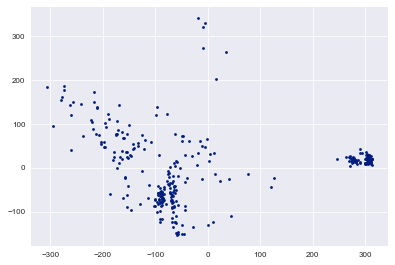

In [113]:
plt.plot(pcaDf.pca1, pcaDf.pca2,'.')

In [58]:
dfxyall  = dfRelRotAll.drop(columns=['likelihood'], level=1)
pca = PCA(n_components=2)
principalComponentsAll = pca.fit_transform(dfxyall)
pcaDfAll = pd.DataFrame(data = principalComponentsAll, columns = ['pca1', 'pca2'])

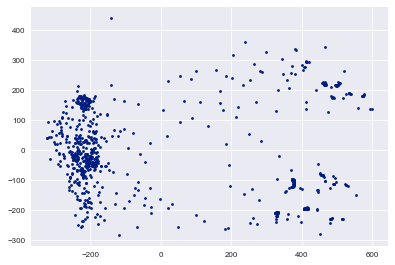

In [59]:
plt.plot(pcaDfAll.pca1, pcaDfAll.pca2,'.')

In [150]:
dfxyT = dfxy.copy()
dfxyT.columns = dfxyT.columns.droplevel()
dfxyT['label'] = ''

In [245]:
dfxyT.loc[0:95, 'label'] = 1
dfxyT.loc[95:135, 'label'] = 2
dfxyT.loc[135:220, 'label'] = 3
dfxyT.loc[220:, 'label'] = 2

In [136]:
y = dfxyT.loc[:,['label']].values

In [246]:
finalDf = pd.concat([pcaDf, dfxyT[['label']]], axis = 1)

In [153]:
finalDf.head()

,pca1,pca2,label
0,-154.639923,35.416871,1
1,-146.019573,27.715623,1
2,-142.981163,43.102661,1
3,-132.879535,56.235479,1
4,-119.612967,62.470004,1


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


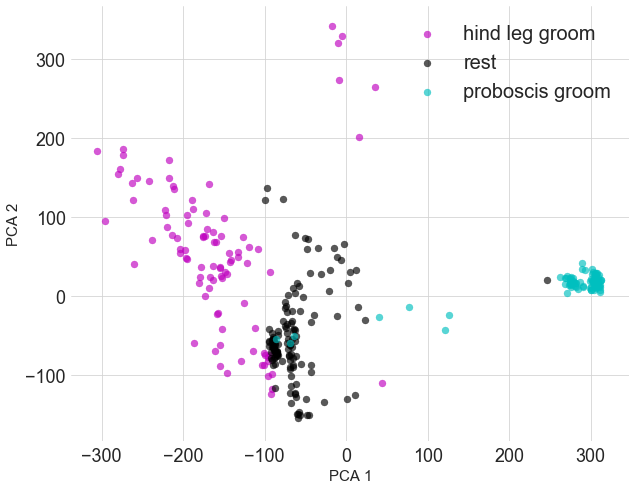

In [247]:
fig = plt.figure(figsize = (10,8)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA 1', fontsize = 15)
ax.set_ylabel('PCA 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3, 4]
colors = ['m', 'k', 'c', 'k']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pca1']
               , finalDf.loc[indicesToKeep, 'pca2']
               , c = color
               , alpha = 0.65
               , s = 50)
ax.legend(['hind leg groom', 'rest', 'proboscis groom'], fontsize=20)
ax.grid(c='lightgray')
ax.set_axis_bgcolor('white')
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18)

In [211]:
dfxy.head()

bodyparts rightForeleg            rightMiddleLeg             rightHindLeg  \
coords               x          y              x           y            x   
0           281.078958 -91.656026      13.808041 -150.971575   -90.504406   
1           283.362535 -92.983378      15.536353 -150.784946   -80.286654   
2           282.696997 -92.168625      15.781687 -151.245679  -105.309670   
3           282.163542 -91.825532      15.062083 -150.149601  -129.383236   
4           280.402241 -93.949619      12.109585 -148.836448  -150.883329   

bodyparts             leftForeleg             leftMiddleLeg              \
coords              y           x           y             x           y   
0          -24.540069  310.642354  109.187027    -35.991825  138.008301   
1          -42.758335  313.803642  108.407822    -32.476493  138.090393   
2          -56.040254  314.113086  109.485544    -33.771356  137.739871   
3          -93.320203  313.883109  109.576630    -32.543696  140.804375   
4         -102.525630  313.496567  106.794235    -31.841687  141.197446   

bodyparts leftHindLeg               proboscis                  head  \
coords              x           y           x         y           x   
0         -121.446297   68.741024  277.910628 -3.017825  193.512737   
1         -116.528495   63.672227  279.620017 -3.416269  195.220364   
2         -115.703311   74.565365  279.336850 -3.446653  195.992249   
3         -111.699600   82.458879  280.181889 -0.462455  193.739169   
4         -101.168229  140.186559  275.483831 -3.818412  190.016931   

bodyparts                  abdomen           bottom       
coords                y          x         y      x    y  
0         -3.552714e-15  81.913776 -0.092178    0.0  0.0  
1          1.421085e-14  83.894589 -0.259431    0.0  0.0  
2         -2.486900e-14  84.620387 -0.748981    0.0  0.0  
3          3.552714e-14  85.503135  0.396662    0.0  0.0  
4          1.065814e-13  79.180174 -0.633104    0.0  0.0

In [220]:
from sklearn import neighbors
from matplotlib.colors import ListedColormap

n_neighbors = 15

X = dfxy.copy()
X.columns = dfxy.columns.droplevel()
y = dfxyT['label']

h = .02  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [256]:
from sklearn.model_selection import train_test_split

X = dfxy.copy()
X.columns = dfxy.columns.droplevel()
y = dfxyT['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [249]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(X_train)
X_train = pca_model.transform(X_train)
X_test = pca_model.transform(X_test)

# 2-Dimensions
X_train[:5]

array([[ 314.3906536 ,   16.37076841],
       [ -78.92446297,  -74.03272145],
       [ -56.65991098,  -76.11600341],
       [-170.14980219,   65.38972033],
       [ 278.22204157,   17.43235065]])

In [257]:
from sklearn.neighbors import KNeighborsClassifier

k = 10

knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [258]:
y_predict = knn_model.predict(X_test)
y_predict

array([1, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2,
       1, 3, 1, 3, 3, 3, 3, 2, 3, 2, 3, 1, 1, 2, 1, 2, 2, 2, 2, 3, 2, 2,
       2, 1, 2, 2, 3, 2, 2, 3, 1, 3, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 3, 2,
       1, 2, 3, 3, 1, 2, 2, 3, 2, 2, 1, 3])

In [261]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.8974358974358975


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


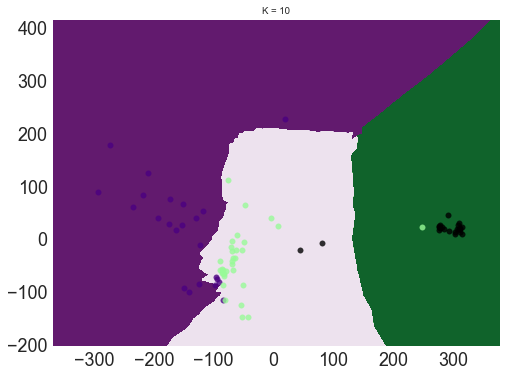

In [255]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
padding = 0.1
resolution = 0.1

colors = {0: 'violet', 1: 'indigo', 2: 'palegreen', 3: 'black', 4: 'blue'}
x_min, x_max = X_train[:, 0].min(), X_train[:, 0].max()
y_min, y_max = X_train[:, 1].min(), X_train[:, 1].max()
x_range = x_max - x_min
y_range = y_max - y_min
x_min -= x_range * padding
y_min -= y_range * padding
x_max += x_range * padding
y_max += y_range * padding

# Get decision boundaries from model
xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                     np.arange(y_min, y_max, resolution))

Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour map
plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn)
plt.axis('tight')

# Plot your testing points as wel
for label in np.unique(y_test):
    indices = np.where(y_test == label)
    plt.scatter(X_test[indices, 0], X_test[indices, 1], c=colors[label], alpha=0.8)
#                 label='Species {}'.format(label))

plt.legend(loc='lower right')
plt.title('K = {}'.format(k))
plt.show()

In [237]:
label

'Species 3'

In [242]:
colors

{0: 'violet', 1: 'indigo', 2: 'palegreen', 4: 'black'}

In [193]:
dfp = pandas.read_pickle('181206_01_2712-2973DeepCut_resnet50_moreTest01May6shuffle1_65700includingmetadata.pickle')

NameError: name 'pandas' is not defined

In [ ]:
dfp.head()

In [ ]:
dfp

In [ ]:
fileList = glob.glob('/Users/felix/moreTest01-felix-2019-05-07/analyzeVideos/*DeepCut_resnet50_moreTest01May6shuffle1_65700.h5')

In [ ]:
fileList